In [60]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq


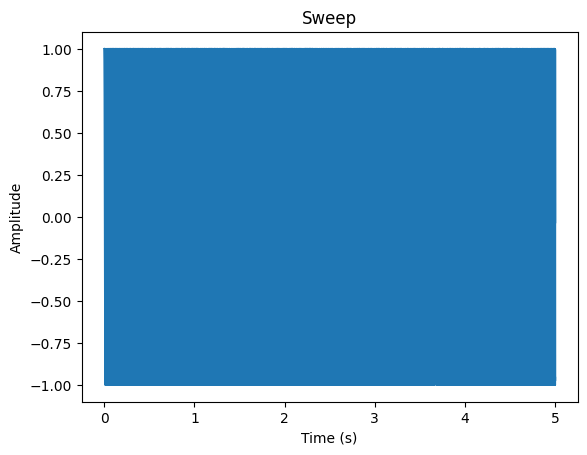

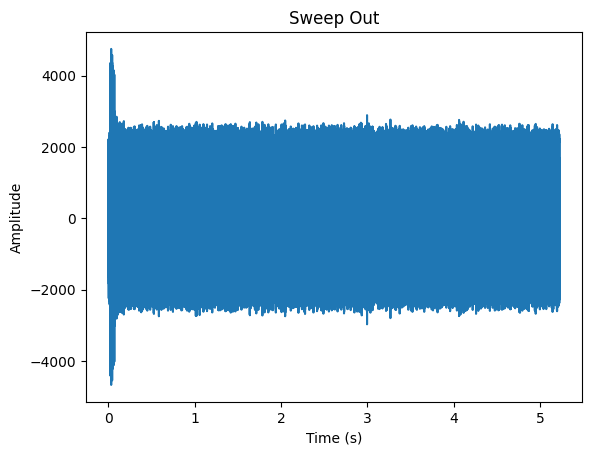

In [61]:
sweep_path = 'inputs/sweep.wav'
sweep_rate, sweep = wavfile.read(sweep_path)

sweep_out_path = 'sweep aup/sweep_out2.wav'
sweep_out_rate, sweep_out = wavfile.read(sweep_out_path)
t = np.linspace(0, len(sweep)/sweep_rate, len(sweep))


#plot the sweep
plt.plot(t, sweep)
plt.title('Sweep')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# plt.xlim(0, 0.1)

plt.show()

#plot the sweep_out
t = np.linspace(0, len(sweep_out)/sweep_out_rate, len(sweep_out))
plt.plot(t, sweep_out)
plt.title('Sweep Out')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
# plt.xlim(0, 0.1)
plt.show()



In [62]:
def apply_fft(data, sample_rate):
    # Perform FFT
    N = len(data)
    yf = fft(data)

    # obtener frecuencias
    xf = fftfreq(N, 1 / sample_rate)

    # Calcular magnitud y fase
    magnitude = np.abs(yf)
    phase = np.angle(yf)

    return xf[:N // 2], magnitude[:N // 2], phase[:N // 2] # devolver solo frecuencias positivas

# Dibuja el diagrama de Bode
def plot_bode(frequencies, magnitude, phase):

    plt.figure(figsize=(8, 6))
    # dibujar magnitud
    plt.subplot(2, 1, 1)
    plt.plot(frequencies, 20 * np.log10(magnitude))
    plt.xscale('log')
    plt.xlim(20,20000)
    plt.title('Magnitude')
    plt.ylabel('Magnitude (dB)')
    plt.grid(which='both', axis='both')

    # dibujar fase
    plt.subplot(2, 1, 2)
    plt.plot(frequencies, np.degrees(phase))
    plt.xscale('log')
    plt.title('Phase')
    plt.xlabel('Frequency (Hz)')
    plt.xlim(20,20000)
    plt.ylabel('Phase (degrees)')
    plt.grid(which='both', axis='both')
    

    plt.tight_layout()

    plt.show()

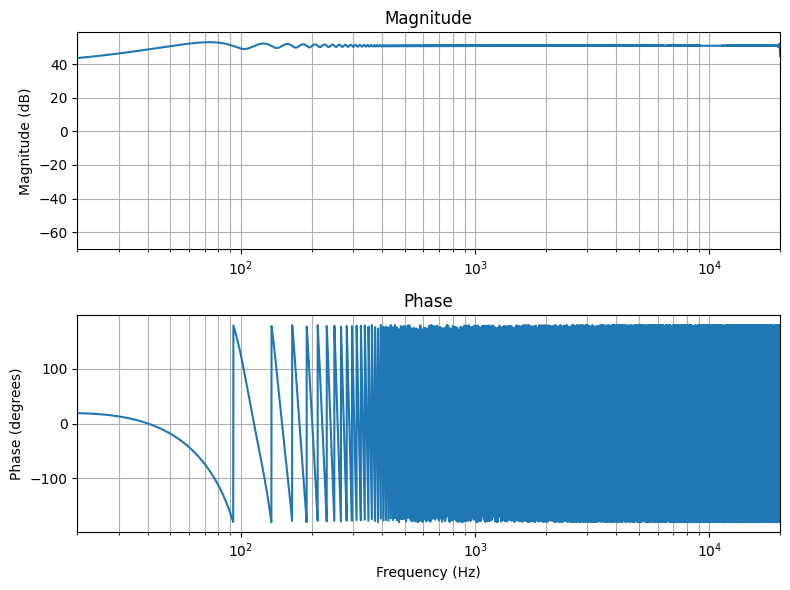

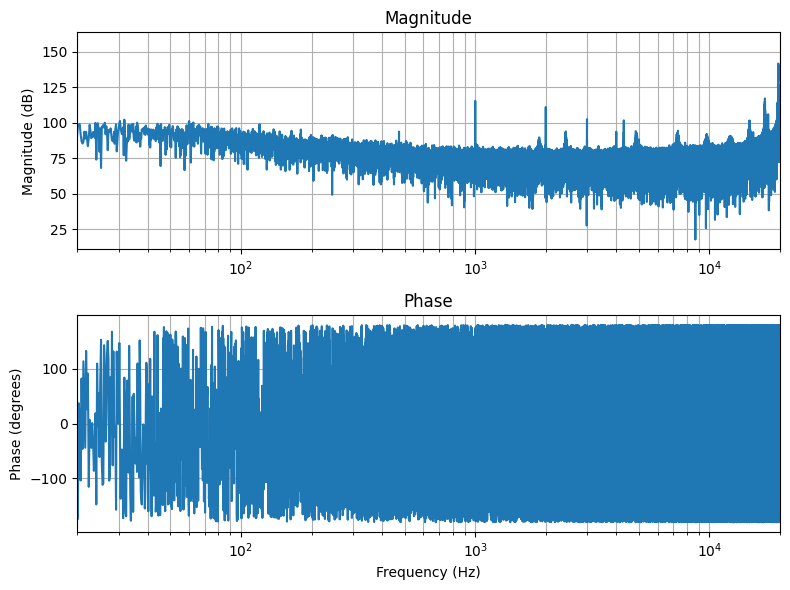

In [63]:
#plot the bode diagram
frequencies, magnitude, phase = apply_fft(sweep, sweep_rate)
plot_bode(frequencies, magnitude, phase)

frequencies, magnitude, phase = apply_fft(sweep_out, sweep_out_rate)
plot_bode(frequencies, magnitude, phase)


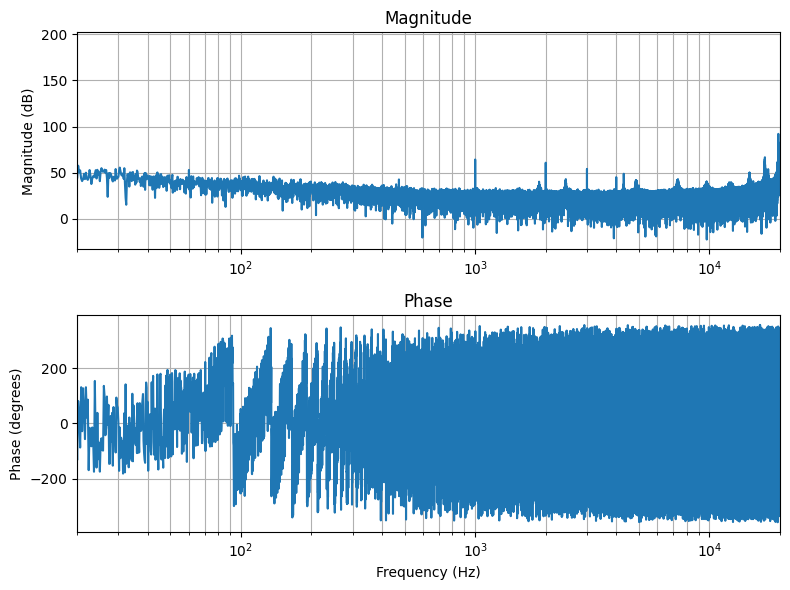

In [64]:
def compute_frequency_responce(sweep, sweep_out, sample_rate):
    # Perform FFT
    N = len(sweep)
    yf = fft(sweep)
    yf_out = fft(sweep_out)

    # obtener frecuencias
    xf = fftfreq(N, 1 / sample_rate)

    # Calcular magnitud y fase
    magnitude = np.abs(yf_out) / np.abs(yf)
    phase = np.angle(yf_out) - np.angle(yf)

    return xf[:N // 2], magnitude[:N // 2], phase[:N // 2] # devolver solo frecuencias positivas

# Dibuja el diagrama de Bode
if len(sweep) != len(sweep_out):
    if len(sweep) > len(sweep_out):
        sweep = sweep[:len(sweep_out)]
    else:
        sweep_out = sweep_out[:len(sweep)]
        
sweep_frequencies, sweep_magnitude, sweep_phase = compute_frequency_responce(sweep, sweep_out, sweep_rate)
plot_bode(sweep_frequencies, sweep_magnitude, sweep_phase)

